### Read CSV file

In [1]:
# Import package
import pandas as pd
import re

# Load data
file_path = '../data/processed/sampled.csv'
df = pd.read_csv(file_path)

# Display the first few rows for inspection
df.head()

,Unnamed: 0,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,33553,6b7d0a0d603b8a3d02b44421fed9d801,2022-04-17,2022-05-30,OAK,ORD,PT7H31M,False,False,False,...,1653973380||1653994560,2022-05-30T22:03:00.000-07:00||2022-05-31T05:5...,PDX||ORD,OAK||PDX,Alaska Airlines||United,AS||UA,Embraer 175||Boeing 737-800,5880||14220,543||1742,coach||coach
1,9427,ffb0b62073c15f83dbd4effb820e14d9,2022-05-02,2022-05-26,OAK,LAX,PT5H37M,False,False,False,...,1653620100||1653633120,2022-05-26T19:55:00.000-07:00||2022-05-26T23:3...,SEA||ONT,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Embraer 175||Boeing 737-900,7200||9120,672||956,coach||coach
2,199,6267c0895a65dc8b6ae2a74e2bd34563,2022-04-19,2022-05-20,OAK,EWR,PT9H14M,False,False,False,...,1653061200||1653089400,2022-05-20T08:40:00.000-07:00||2022-05-20T19:3...,LAX||EWR,OAK||LAX,Delta||United,DL||UA,Embraer 175 (Enhanced Winglets)||Boeing 757-200,5040||19800,338||2458,coach||coach
3,12447,51fb07365a301926b9042e3732368f55,2022-05-13,2022-07-10,OAK,EWR,PT12H45M,False,False,False,...,1657521960||1657562100,2022-07-10T23:46:00.000-07:00||2022-07-11T13:5...,LAS||EWR,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||,5760||17400,None||None,coach||coach
4,39489,143f6dfae663c5919a6f1eb957188637,2022-04-18,2022-05-25,OAK,SFO,PT5H,False,False,False,...,1653504960||1653516060,2022-05-25T12:56:00.000-06:00||2022-05-25T15:0...,SLC||SFO,OAK||SLC,Delta||United,DL||UA,Embraer 175 (Enhanced Winglets)||Boeing 737-800,6900||7680,588||599,coach||coach


### Understand Datatype for each column

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135500 entries, 0 to 135499
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         135500 non-null  int64  
 1   legId                              135500 non-null  object 
 2   searchDate                         135500 non-null  object 
 3   flightDate                         135500 non-null  object 
 4   startingAirport                    135500 non-null  object 
 5   destinationAirport                 135500 non-null  object 
 6   travelDuration                     135500 non-null  object 
 7   isBasicEconomy                     135500 non-null  bool   
 8   isRefundable                       135500 non-null  bool   
 9   isNonStop                          135500 non-null  bool   
 10  totalFare                          135500 non-null  float64
 11  totalTravelDistance                1257

In [3]:
# Make a copy dataframe before preprocessing
df_copy = df.copy()

### Data preprocessing

In [4]:
# Drop nan value
df_copy.dropna(inplace=True)

In [5]:
# Define a function for preprocessing
def preprocessor(df):
  # Define a function to convert duration strings to minutes
  def convert_duration(duration_string):
    # Extract hours and minutes using regular expressions
    hours_match = re.search(r'(\d+)H', duration_string)
    minutes_match = re.search(r'(\d+)M', duration_string)

    # Initialize variables to store hours and minutes
    hours = 0
    minutes = 0

    # Convert hours and minutes to integers 
    if hours_match:
        hours = int(hours_match.group(1))
    if minutes_match:
        minutes = int(minutes_match.group(1))

    # Calculate the total duration in minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

  # Define a functionto convert the column to datetime data type   
  def convert_column_to_datetime(column):
    try:
        return pd.to_datetime(column)
    except ValueError:
        return column

  # Define a function to drop column
  def drop_columns(df, columns_to_drop):
    try:
        df = df.drop(columns_to_drop, axis=1)
        return df
    except KeyError:
        return None

  # Split the specified column by '||' and create two new columns  
  def split_column_into_two(df, column_name, new_column1_name, new_column2_name):
    try:
        split_values = df[column_name].str.split(r'\|\|', expand=True)
        df[new_column1_name] = split_values[0]
        df[new_column2_name] = split_values[1]
        return df
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return None

  def extract_transfer_airport_code(df, arrival_airport_column, new_column_name):
    try:
        # Extract the transfer airport code from the specified column
        df[new_column_name] = df[arrival_airport_column].str.split(r'\|\|').str[0]
        return df
    except KeyError:
        print(f"Column '{arrival_airport_column}' not found in the DataFrame.")
        return None



  # Apply the function to the 'duration_column' and replace the values
  df['travelDuration'] = df['travelDuration'].apply(convert_duration)

  # Apply the function to multiple columns and replace the values
  columns_to_convert = ['searchDate', 'flightDate']
  df[columns_to_convert] = df[columns_to_convert].apply(convert_column_to_datetime)

  # Apply the function 'split_column_into_two' to deal with the "segments" columns
  # Transfer "segmentsDepartureTimeRaw" -> the "DepartureTimeRaw_1", "DepartureTimeRaw_2"
  new_column1_name = 'DepartureTimeRaw_1'
  new_column2_name = 'DepartureTimeRaw_2'
  df = split_column_into_two(df, 'segmentsDepartureTimeRaw', new_column1_name, new_column2_name)

  # Transfer "segmentsArrivalTimeEpochSeconds" -> the "ArrivalTimeEpochSeconds_1", "ArrivalTimeEpochSeconds_2"
  new_column1_name = 'ArrivalTimeEpochSeconds_1'
  new_column2_name = 'ArrivalTimeEpochSeconds_2'
  df = split_column_into_two(df, 'segmentsArrivalTimeEpochSeconds', new_column1_name, new_column2_name)

  # Transfer "segmentsArrivalTimeRaw" -> the "ArrivalTimeRaw_1", "ArrivalTimeRaw_2"
  new_column1_name = 'ArrivalTimeRaw_1'
  new_column2_name = 'ArrivalTimeRaw_2'
  df = split_column_into_two(df, 'segmentsArrivalTimeRaw', new_column1_name, new_column2_name)

  # Transfer "segmentsAirlineName" -> the "AirlineName_1", "AirlineName_2"
  new_column1_name = 'AirlineName_1'
  new_column2_name = 'AirlineName_2'
  df = split_column_into_two(df, 'segmentsAirlineName', new_column1_name, new_column2_name)

  # Transfer "segmentsAirlineCode" -> the "AirlineCode_1", "AAirlineCode_2irlineName_2"
  new_column1_name = 'AirlineCode_1'
  new_column2_name = 'AirlineCode_2'
  df = split_column_into_two(df, 'segmentsAirlineCode', new_column1_name, new_column2_name)

  # Transfer "segmentsEquipmentDescription" -> the "EquipmentDescription_1", "EquipmentDescription_2"
  new_column1_name = 'EquipmentDescription_1'
  new_column2_name = 'EquipmentDescription_2'
  df = split_column_into_two(df, 'segmentsEquipmentDescription', new_column1_name, new_column2_name)

  # Transfer "segmentsDurationInSeconds" -> the "DurationInSeconds_1", "DurationInSeconds_2"
  new_column1_name = 'DurationInSeconds_1'
  new_column2_name = 'DurationInSeconds_2'
  df = split_column_into_two(df, 'segmentsDurationInSeconds', new_column1_name, new_column2_name)

  # Transfer "segmentsDurationInSeconds" -> the "Distance_1", "Distance_2"
  new_column1_name = 'Distance_1'
  new_column2_name = 'Distance_2'
  df = split_column_into_two(df, 'segmentsDistance', new_column1_name, new_column2_name)

  # Transfer "segmentsCabinCode" -> the "CabinCode_1", "CabinCode_2"
  new_column1_name = 'CabinCode_1'
  new_column2_name = 'CabinCode_2'
  df = split_column_into_two(df, 'segmentsCabinCode', new_column1_name, new_column2_name)

  # Transfer "segmentsArrivalAirportCode" and "segmentsDepartureAirportCode" -> only contain the transfer airport
  new_column_name = 'transfer_airport'
  df = extract_transfer_airport_code(df, 'segmentsArrivalAirportCode', new_column_name)

  # Apply the column 'columns_to_drop' to drop the column
  columns_to_drop = [ 'Unnamed: 0', 'legId',
                      'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds','segmentsArrivalTimeRaw',
                      'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription',
                      'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
                      'segmentsDepartureTimeEpochSeconds', 'segmentsArrivalAirportCode',
                      'segmentsDepartureAirportCode']
  df = drop_columns(df, columns_to_drop)

  return df

In [6]:
# Use function to clean the data
df_cleaning = preprocessor(df_copy)

In [7]:
# Find the missing value
missing_values = df_cleaning.isna()

# Count missing values in each column using sum()
missing_count = missing_values.sum()
print(missing_count)

searchDate                       0
flightDate                       0
startingAirport                  0
destinationAirport               0
travelDuration                   0
isBasicEconomy                   0
isRefundable                     0
isNonStop                        0
totalFare                        0
totalTravelDistance              0
DepartureTimeRaw_1               0
DepartureTimeRaw_2           36132
ArrivalTimeEpochSeconds_1        0
ArrivalTimeEpochSeconds_2    36132
ArrivalTimeRaw_1                 0
ArrivalTimeRaw_2             36132
AirlineName_1                    0
AirlineName_2                36132
AirlineCode_1                    0
AirlineCode_2                36132
EquipmentDescription_1           0
EquipmentDescription_2       36132
DurationInSeconds_1              0
DurationInSeconds_2          36132
Distance_1                       0
Distance_2                   36132
CabinCode_1                      0
CabinCode_2                  36132
transfer_airport    

In [8]:
# Drop nan value
df_cleaning.dropna(inplace=True)

In [9]:
# Check the processing columns
df_cleaning.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,...,AirlineCode_2,EquipmentDescription_1,EquipmentDescription_2,DurationInSeconds_1,DurationInSeconds_2,Distance_1,Distance_2,CabinCode_1,CabinCode_2,transfer_airport
0,2022-04-17,2022-05-30,OAK,ORD,451,False,False,False,742.60,2285.0,...,UA,Embraer 175,Boeing 737-800,5880,14220,543,1742,coach,coach,PDX
1,2022-05-02,2022-05-26,OAK,LAX,337,False,False,False,431.61,1628.0,...,AS,Embraer 175,Boeing 737-900,7200,9120,672,956,coach,coach,SEA
2,2022-04-19,2022-05-20,OAK,EWR,554,False,False,False,581.60,2796.0,...,UA,Embraer 175 (Enhanced Winglets),Boeing 757-200,5040,19800,338,2458,coach,coach,LAX
4,2022-04-18,2022-05-25,OAK,SFO,300,False,False,False,433.61,1187.0,...,UA,Embraer 175 (Enhanced Winglets),Boeing 737-800,6900,7680,588,599,coach,coach,SLC
6,2022-05-01,2022-05-17,OAK,ATL,930,False,False,False,581.70,2412.0,...,UA,Embraer 175 (Enhanced Winglets),Boeing 757-300,4860,11220,338,1383,coach,coach,LAX


In [10]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87434 entries, 0 to 135499
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   searchDate                 87434 non-null  datetime64[ns]
 1   flightDate                 87434 non-null  datetime64[ns]
 2   startingAirport            87434 non-null  object        
 3   destinationAirport         87434 non-null  object        
 4   travelDuration             87434 non-null  int64         
 5   isBasicEconomy             87434 non-null  bool          
 6   isRefundable               87434 non-null  bool          
 7   isNonStop                  87434 non-null  bool          
 8   totalFare                  87434 non-null  float64       
 9   totalTravelDistance        87434 non-null  float64       
 10  DepartureTimeRaw_1         87434 non-null  object        
 11  DepartureTimeRaw_2         87434 non-null  object        
 12  ArrivalT

In [11]:
# Define function for feature engineering 
def feature_engineering(df):

  # Define the columns from the preprocessor and tranfer into date time with UTC type
  def convert_columns_to_datetime_utc(df, columns, format='%Y-%m-%dT%H:%M:%S.%f%z'):
    try:
        for column in columns:
            df[column] = pd.to_datetime(df[column], format=format, utc=True)
        return df
    except KeyError as e:
        print(f"Column '{e}' not found in the DataFrame.")
        return None

  # Define the function to calculate the time the passenger to wait for another flight
  def calculate_transfer_waiting_time(df, datetime_column1, datetime_column2, new_column_name):
    """
    Calculate the transfer waiting time in minutes by subtracting datetime_column1 from datetime_column2.

    Parameters:
    df: The DataFrame containing the datetime columns.
    datetime_column1: Name of the first datetime column.
    datetime_column2: Name of the second datetime column.
    new_column_name: Name for the new column to store the transfer waiting time in minutes.

    Returns:
    dataframe: The original dataframe with the new column.
    """
    df[new_column_name] = (df[datetime_column2] - df[datetime_column1]).dt.total_seconds() / 60
    return df


  # Define the function to calculate how many days search before departure
  def calculate_time_duration(df, date_column1, date_column2, new_column_name):
    """
    Calculate the time duration in days by subtracting date_column2 from date_column1.

    Parameters:
    df: The DataFrame containing the date columns.
    date_column1: Name of the first date column.
    date_column2: Name of the second date column.
    new_column_name: Name for the new column to store the time duration in days.

    Returns:
    dataframe: The original DataFrame with the new time duration column.
    """
    df[new_column_name] = (df[date_column1] - df[date_column2]).dt.days
    return df

  # Define the function to convert data type to integer   
  def convert_object_columns_to_integer(df, columns):
    df[columns] = df[columns].astype(int)
    return df


  # Define a function to drop column
  def drop_columns(df, columns_to_drop):
    try:
        df = df.drop(columns_to_drop, axis=1)
        return df
    except KeyError:
        return None


  # Apply 'convert_columns_to_datetime_utc' to datetime with UTC
  columns_to_convert = ['DepartureTimeRaw_1', 'DepartureTimeRaw_2', 'ArrivalTimeRaw_1', 'ArrivalTimeRaw_2']
  df = convert_columns_to_datetime_utc(df, columns_to_convert)

  # Apply the 'calculate_transfer_waiting_time' to calculate the transfer waiting time
  df = calculate_transfer_waiting_time(df, 'ArrivalTimeRaw_1', 'DepartureTimeRaw_2', 'transfer_waiting_time')

  # Apply the 'calculate_time_duration' to calculate how many days search before departure
  df = calculate_time_duration(df, 'flightDate','searchDate', 'time_duration')

  # Apply the 'convert_object_columns_to_integer' to tranfer data type into integer
  num_columns = ['ArrivalTimeEpochSeconds_1', 'ArrivalTimeEpochSeconds_2', 'DurationInSeconds_1', 'DurationInSeconds_2', 'Distance_1', 'Distance_2']
  df = convert_object_columns_to_integer(df, num_columns)


  # Apply the column 'columns_to_drop' to drop the column
  columns_to_drop = ['searchDate', 'flightDate', 'DepartureTimeRaw_1', 'DepartureTimeRaw_2', 'ArrivalTimeEpochSeconds_1', 'ArrivalTimeEpochSeconds_2', 'ArrivalTimeRaw_1', 'ArrivalTimeRaw_2']
  df = drop_columns(df, columns_to_drop)

  return df

In [12]:
# Use feature_engineering function to clean the data
df_cleaned = feature_engineering(df_cleaning)

In [13]:
# Check the completed cleaned data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87434 entries, 0 to 135499
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   startingAirport         87434 non-null  object 
 1   destinationAirport      87434 non-null  object 
 2   travelDuration          87434 non-null  int64  
 3   isBasicEconomy          87434 non-null  bool   
 4   isRefundable            87434 non-null  bool   
 5   isNonStop               87434 non-null  bool   
 6   totalFare               87434 non-null  float64
 7   totalTravelDistance     87434 non-null  float64
 8   AirlineName_1           87434 non-null  object 
 9   AirlineName_2           87434 non-null  object 
 10  AirlineCode_1           87434 non-null  object 
 11  AirlineCode_2           87434 non-null  object 
 12  EquipmentDescription_1  87434 non-null  object 
 13  EquipmentDescription_2  87434 non-null  object 
 14  DurationInSeconds_1     87434 non-null  in

In [14]:
# Check missing value
missing_values = df_cleaned.isna()

# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

startingAirport           0
destinationAirport        0
travelDuration            0
isBasicEconomy            0
isRefundable              0
isNonStop                 0
totalFare                 0
totalTravelDistance       0
AirlineName_1             0
AirlineName_2             0
AirlineCode_1             0
AirlineCode_2             0
EquipmentDescription_1    0
EquipmentDescription_2    0
DurationInSeconds_1       0
DurationInSeconds_2       0
Distance_1                0
Distance_2                0
CabinCode_1               0
CabinCode_2               0
transfer_airport          0
transfer_waiting_time     0
time_duration             0
dtype: int64


In [15]:
df_cleaned.head()

,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,AirlineName_1,AirlineName_2,...,EquipmentDescription_2,DurationInSeconds_1,DurationInSeconds_2,Distance_1,Distance_2,CabinCode_1,CabinCode_2,transfer_airport,transfer_waiting_time,time_duration
0,OAK,ORD,451,False,False,False,742.60,2285.0,Alaska Airlines,United,...,Boeing 737-800,5880,14220,543,1742,coach,coach,PDX,116.0,43
1,OAK,LAX,337,False,False,False,431.61,1628.0,Alaska Airlines,Alaska Airlines,...,Boeing 737-900,7200,9120,672,956,coach,coach,SEA,65.0,24
2,OAK,EWR,554,False,False,False,581.60,2796.0,Delta,United,...,Boeing 757-200,5040,19800,338,2458,coach,coach,LAX,140.0,31
4,OAK,SFO,300,False,False,False,433.61,1187.0,Delta,United,...,Boeing 737-800,6900,7680,588,599,coach,coach,SLC,57.0,37
6,OAK,ATL,930,False,False,False,581.70,2412.0,Delta,United,...,Boeing 757-300,4860,11220,338,1383,coach,coach,LAX,410.0,16


### Data visualization

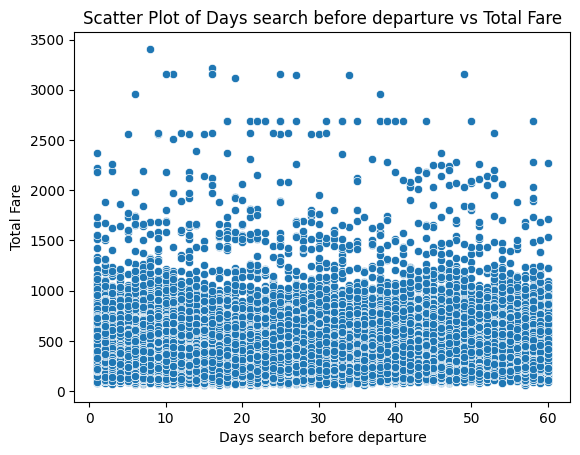

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new data frame -> not to change the original data
df_val = df_cleaned[['time_duration', 'totalFare']]

# Create a scatter plot using Seaborn package
sns.scatterplot(data=df_val, x='time_duration', y='totalFare')

# Add labels and a title
plt.xlabel('Days search before departure')
plt.ylabel('Total Fare')
plt.title('Scatter Plot of Days search before departure vs Total Fare')

# Show the plot
plt.show()


<ipython-input-19-5e1c1742a091>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['transfer_waiting_time_hr'] = [time / 60 for time in df_cleaned['transfer_waiting_time']]


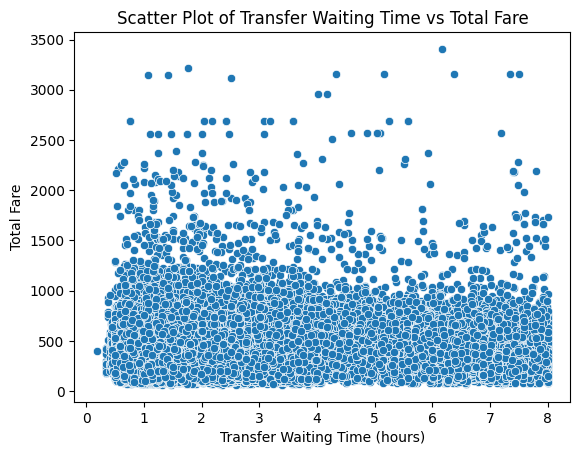

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new data frame -> not to change the original data
df_val = df_cleaned[['transfer_waiting_time', 'totalFare']]
df_val['transfer_waiting_time_hr'] = [time / 60 for time in df_cleaned['transfer_waiting_time']]

# Create a scatter plot using Seaborn
sns.scatterplot(data=df_val, x='transfer_waiting_time_hr', y='totalFare')

# Add labels and a title
plt.xlabel('Transfer Waiting Time (hours)')
plt.ylabel('Total Fare')
plt.title('Scatter Plot of Transfer Waiting Time vs Total Fare')

# Show the plot
plt.show()


In [17]:
# Seperate data for features -> X and target column -> y
X = df_cleaned.drop('totalFare', axis=1)
y = df_cleaned['totalFare']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87434 entries, 0 to 135499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   startingAirport         87434 non-null  object 
 1   destinationAirport      87434 non-null  object 
 2   travelDuration          87434 non-null  int64  
 3   isBasicEconomy          87434 non-null  bool   
 4   isRefundable            87434 non-null  bool   
 5   isNonStop               87434 non-null  bool   
 6   totalTravelDistance     87434 non-null  float64
 7   AirlineName_1           87434 non-null  object 
 8   AirlineName_2           87434 non-null  object 
 9   AirlineCode_1           87434 non-null  object 
 10  AirlineCode_2           87434 non-null  object 
 11  EquipmentDescription_1  87434 non-null  object 
 12  EquipmentDescription_2  87434 non-null  object 
 13  DurationInSeconds_1     87434 non-null  int32  
 14  DurationInSeconds_2     87434 non-null  in

### Build pipeline

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Define columns for numerical processing and categorical processing
numeric_features = ['travelDuration', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'totalTravelDistance', ]
ordinal_features = ['startingAirport', 'destinationAirport', 'AirlineName_1', 'AirlineName_2', 'AirlineCode_1', 'AirlineCode_2', 'EquipmentDescription_1', 'EquipmentDescription_2', 'CabinCode_1', 'CabinCode_2', 'transfer_airport']

# Standardize numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encode ordinal features
ordinal_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())  
])

# Create a ColumnTransformer to apply feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder='passthrough'  # Pass through object features as is
)

# Create the final pipeline with data preprocessing and Decision Tree model
from sklearn.tree import DecisionTreeRegressor  
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# Use the pipeline to fit and transform data
X = df_cleaned[numeric_features + ordinal_features]
y = df_cleaned['totalFare']
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['travelDuration',
                                                   'isBasicEconomy',
                                                   'isRefundable', 'isNonStop',
                                                   'totalTravelDistance']),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['startingAirport',
                                                   'destinationAirport',
                                                   'AirlineName_1',
                                                   'AirlineName_2',
                                                   'AirlineCode_1',
                                                   'AirlineCode_2',
                                                   'EquipmentDescription_1',
                                                   'EquipmentDescription_2',
                                                   'CabinCode_1', 'CabinCode_2',
                                                   'transfer_airport'])])),
                ('model', DecisionTreeRegressor())])

In [20]:
# Splite data into training and testing data set
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Define hyperparameter for the Decision Tree
param_dist = {
    'model__max_depth': [None] + list(np.arange(2, 20)),
    'model__min_samples_split': np.arange(2, 11),
    'model__min_samples_leaf': np.arange(1, 11),
    'model__max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.1, 1.0, 0.1))
}

# Create the Randomized Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=15,
    cv=5, n_jobs=-1, verbose=1, random_state=42
)

# Fit the Randomized Search to training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

# Save the best model
best_model = random_search.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best hyperparameters: {'model__min_samples_split': 2, 'model__min_samples_leaf': 6, 'model__max_features': 0.30000000000000004, 'model__max_depth': 14}


### Evaluate model

In [ ]:
# Use the testing data to predict target price and store in y_pred
y_pred = pipeline.predict(X_test)

# Import package
from sklearn.metrics import mean_squared_error

# Calculate the mse and rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# print the mse and rmse
print("mse:", mse)
print("rmse:", rmse )

mse: 3278.4464852992737
rmse: 57.25771987513364


In [ ]:
# Store the model
import joblib
best_model = random_search.best_estimator_
joblib.dump(best_model, '../models/decision_tree_regression.pkl')